# Stellar micro-lensing simulation

In this notebook, we simulate and animate stellar micro-lensing events.
Lentstronomy does not perform any approximations to speed up the calculation and is capable to compute micro-lensing events of arbitrary complexities

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from lenstronomy.Cosmo.micro_lensing import einstein_radius, source_size
from lenstronomy.Util import util
from lenstronomy.LensModel.lens_model import LensModel
from lenstronomy.LightModel.light_model import LightModel

## Single lens

In [21]:
# define the microlens

# =========
# distances
# =========

d_l = 4000  # distance of the lens in pc
d_s = 8000  # distance of the source in pc

# ===========
# lens system
# ===========

M0 = 0.01  # mass of the main lens in units of M_sol
# (mass is choosen relatively small such that the numerical ray-tracing is efficient)


# ===========
# source size
# ===========

diameter_s = 1  # size of the radius of the source star in units of the solar radius


In [22]:
# compute lensing properties

theta_E = einstein_radius(M0, d_l, d_s)
print(theta_E, 'Einstein radius [arc seconds]')

size_s = source_size(diameter_s, d_s)
print(size_s, 'source size [arc seconds]')


0.00010090910723578977 Einstein radius [arc seconds]
1.163118159836867e-06 source size [arc seconds]


In [23]:
# compute ray-tracing grid

grid_scale = size_s / 4.  # ten times the source size resolution
grid_width = theta_E * 4
num_pix = int(grid_width / grid_scale)
print(num_pix, "number of pixels per axis")

x, y = util.make_grid(numPix=num_pix, deltapix=grid_scale)

1388 number of pixels per axis


In [30]:
# map image to source plane
lens = LensModel(lens_model_list=['POINT_MASS'])
kwargs_lens = [{'theta_E': theta_E, 'center_x': 0, 'center_y': 0}]

beta_x, beta_y = lens.ray_shooting(x, y, kwargs=kwargs_lens)

# compute surface brightness
ligth = LightModel(light_model_list=['ELLIPSOID'])
kwargs_light = [{'amp': 1, 'radius': size_s/2 * 10, 'e1': 0, 'e2': 0, 'center_x': 0 + theta_E/4, 'center_y': 0}]
surface_brightness = ligth.surface_brightness(beta_x, beta_y, kwargs_light)

# calculate image magnification as integral of the surface brightness 
# ('amp'=1 is normalized such that intrinsic flux=1)

mag = np.sum(surface_brightness * grid_scale**2)
print(mag, "image magnification")

# turn 1d array into 2d image
image = util.array2image(surface_brightness)


4.095056685754468 image magnification


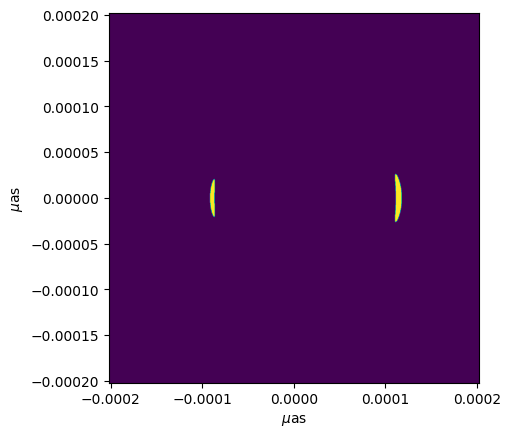

In [31]:
plt.imshow(image, extent = [-grid_width/2, grid_width/2, -grid_width/2, grid_width/2])
plt.xlabel(r'$\mu$as')
plt.ylabel(r'$\mu$as')
plt.show()

## Binary lens

In [32]:
# define secondary lens

M1 = 0.01  # secondary mass of the lens
d_01 = 1  # distance of M0 to M1 in units of AU

theta_E1 = einstein_radius(M1, d_l, d_s)
print(theta_E1, 'Einstein radius [arc seconds]')

0.00010090910723578977 Einstein radius [arc seconds]


In [33]:
# map image to source plane
lens_binary = LensModel(lens_model_list=['POINT_MASS', 'POINT_MASS'])
kwargs_lens_binary = [{'theta_E': theta_E, 'center_x': 0, 'center_y': 0},
               {'theta_E': theta_E1, 'center_x': 0.0001, 'center_y': 0}]

beta_x, beta_y = lens_binary.ray_shooting(x, y, kwargs=kwargs_lens_binary)
surface_brightness_binary = ligth.surface_brightness(beta_x, beta_y, kwargs_light)

# calculate image magnification as integral of the surface brightness 
# ('amp'=1 is normalized such that intrinsic flux=1)

mag = np.sum(surface_brightness_binary * grid_scale**2)
print(mag, "image magnification")

# turn 1d array into 2d image
image = util.array2image(surface_brightness_binary)


16.211522503340458 image magnification


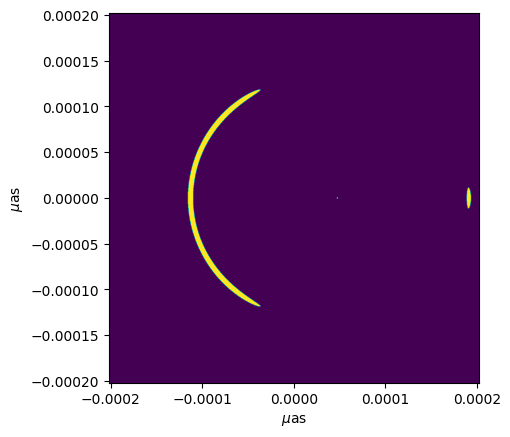

In [34]:
plt.imshow(image, extent = [-grid_width/2, grid_width/2, -grid_width/2, grid_width/2])
plt.xlabel(r'mas')
plt.ylabel(r'mas')
plt.show()